In [1]:
import pandas as pd
import geopandas as gp
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from matplotlib import gridspec


import seaborn as sns
import contextily as ctx

# !conda install -c conda-forge geopandas geoplot -y
%matplotlib inline
pd.set_option('display.max_columns', 500)

## Reading files and graphing output

Geopandas can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more, let's look at an example below using data from West Victoria.
<br><br>

Download the data used in this example and try yourself here: https://drive.google.com/drive/folders/1aC6ZBV4rR_jCDQa4SJFdmRH777gjS3ce?usp=sharing

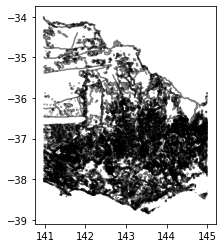

In [2]:
df = gp.read_file('./data/westVIC-structdata.shp')
ax = df.plot(figsize=(4, 4), alpha=0.5, edgecolor='k')

## Adding a background map to plots

Geopandas makes use of the contextily package to retrieve web map tiles from several sources (OpenStreetMap, Stamen), making it really easy to add basemaps to your projects.

In [3]:
# Web map tiles are typically provided in Web Mercator (EPSG 3857), 
# so we need to make sure to convert our data first to the same CRS
df = df.to_crs('EPSG:3857')

C:\Users\user1\miniconda3\envs\course\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


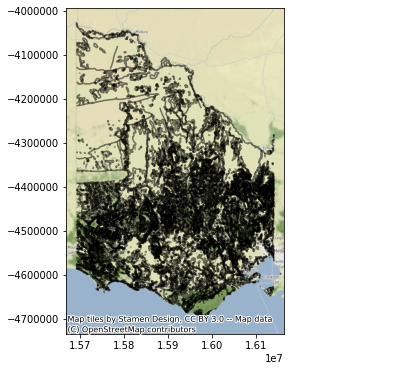

In [4]:
ax = df.plot(figsize=(4, 6), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

## Filetering data

We can filter data using our understanding of pandas data frames in a comparable way to querying in GIS software.

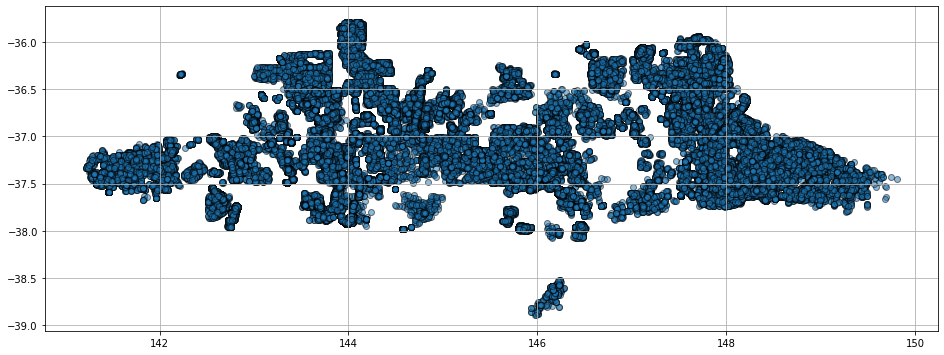

In [5]:
minerals = gp.read_file('./data/gchem_geo_gda94.shp')
ax = minerals.plot(figsize=(16, 6), alpha=0.5, edgecolor='k')
ax.grid(True)

In [6]:
# We can check the projection of a given dataset as a property
minerals.crs

{'init': 'epsg:4283'}

### We want to
* clip the data, to contain points from the south west region
* only retain points that have high copper ie > 1000

You can also use geopandas.clip with a polygon layer mask for non rectangular ROIs.

In [7]:
cu_westvic = minerals[(minerals.LONGITUDE < 145.0) & (minerals.LATITUDE < -37.0) & (minerals.CU_PPM > 2000.0)]

# Displa first five rows of the resulting dataframe
cu_westvic.head()

,FEATURE,FEATCODE,AGSO_CODE,SITEID,ORIG_ID,SITE_TYPE,SAMP_TYPE,SAMP_METH,FRACTION,COMPANY,PROSPECT,AU_PPB,AU_OTHER,AU_METH,CU_PPM,CU_METH,PB_PPM,PB_METH,ZN_PPM,ZN_METH,AG_PPM,AG_METH,AS_PPM,AS_METH,AL_PPM,AL_METH,CA_PPM,CA_METH,FE_PPM,FE_METH,K_PPM,K_METH,MG_PPM,MG_METH,MN_PPM,MN_METH,NA_PPM,NA_METH,P_PPM,P_METH,S_PPM,S_METH,SB_PPM,SB_METH,NI_PPM,NI_METH,CO_PPM,CO_METH,BI_PPM,BI_METH,MO_PPM,MO_METH,SN_PPM,SN_METH,W_PPM,W_METH,OTHER_ANAL,LITHO_GRAD,SITE_COMM,MAP25,MAP50,MAP100,MAP250,DATUM,ZONE,EASTING,NORTHING,LATITUDE,LONGITUDE,LOCN_ACC,LOCN_METH,ELEV_GL,ELEV_ACC,ELEV_METH,LOCALNAME1,geometry
6390,GCHEM,101078,0,557135,45,GCHEM,SOIL,Part digest metal in organics,N/A,Golden Triangle Resources NL,Harcourt (Golden Triangle Resources NL),-999.0,None,None,3500.0,ICP-MS (MMI),2700.0,ICP-MS (MMI),23000.0,ICP-MS (MMI),5.2,ICP-MS (MMI),-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,2.0,ICP-MS (MMI),-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,1100.0,ICP-MS (MMI),-999.0,None,-999.0,None,1,None,None,None,7723,7723,SJ 55-5,GDA94,55,262812.0,5900385.0,-37.0128,144.3341,100,Unknown,0.0,0,Unknown,None,POINT (144.33407 -37.01280)
7923,GCHEM,101078,0,615475,JN3-222,GCHEM,SOIL,Shallow auger soil sample,N/A,Pennzoil of Australia Ltd,Stavely (Pennzoil),-999.0,None,None,3200.0,"Perchloric acid digest @ 220 degC, AAS",10.0,"Perchloric acid digest @ 220 degC, AAS",20.0,"Perchloric acid digest @ 220 degC, AAS",-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,0,None,None,None,7422,7422,SJ 54-8,GDA94,54,642663.0,5835749.0,-37.6143,142.6164,100,Unknown,0.0,0,Unknown,None,POINT (142.61643 -37.61430)
25003,GCHEM,101078,0,558574,213,GCHEM,SOIL,Part digest metal in organics,N/A,Golden Triangle Resources NL,Newstead (Golden Triangle Resources NL),-999.0,None,None,10800.0,ICP-MS (MMI),15400.0,ICP-MS (MMI),815000.0,ICP-MS (MMI),15.0,ICP-MS (MMI),-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,3.1,ICP-MS (MMI),-999.0,None,-999.0,None,-999.0,None,-999.0,None,2100000.0,ICP-MS (MMI),890.0,ICP-MS (MMI),710.0,ICP-MS (MMI),1100.0,ICP-MS (MMI),-999.0,None,-999.0,None,1,None,None,None,7723,7723,SJ 55-5,GDA94,55,237112.0,5878884.0,-37.1995,144.0380,100,Unknown,0.0,0,Unknown,None,POINT (144.03801 -37.19951)
25808,GCHEM,101078,0,557132,40,GCHEM,SOIL,Part digest metal in organics,N/A,Golden Triangle Resources NL,Harcourt (Golden Triangle Resources NL),-999.0,None,None,6400.0,ICP-MS (MMI),2900.0,ICP-MS (MMI),91300.0,ICP-MS (MMI),6.4,ICP-MS (MMI),-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,3.3,ICP-MS (MMI),-999.0,None,-999.0,None,-999.0,None,-999.0,None,610.0,ICP-MS (MMI),790.0,ICP-MS (MMI),630.0,ICP-MS (MMI),920.0,ICP-MS (MMI),-999.0,None,-999.0,None,2,None,None,None,7723,7723,SJ 55-5,GDA94,55,258412.0,5898384.0,-37.0297,144.2840,100,Unknown,0.0,0,Unknown,None,POINT (144.28402 -37.02969)
54957,GCHEM,101078,0,558570,209,GCHEM,SOIL,Part digest metal in organics,N/A,Golden Triangle Resources NL,Newstead (Golden Triangle Resources NL),-999.0,None,None,28100.0,ICP-MS (MMI),7400.0,ICP-MS (MMI),495000.0,ICP-MS (MMI),31.0,ICP-MS (MMI),-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,-999.0,None,2.3,ICP-MS (MMI),-999.0,None,-999.0,None,-999.0,None,-999.0,None,5000000.0,ICP-MS (MMI),910.0,ICP-MS (MMI),610.0,ICP-MS (MMI),1500.0,ICP-MS (MMI),1300.0,ICP-MS (MMI),-999.0,None,2,None,None,None,7723,7723,SJ 55-5,GDA94,55,234722.0,5878785.0,-37.1997,144.0111,100,Unknown,0.0,0,Unknown,None,POINT (144.01108 -37.19973)


### Displaying the results

We can use pass column and cmap parameters to the plot method to get a gradient for points based on that column.

C:\Users\user1\miniconda3\envs\course\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


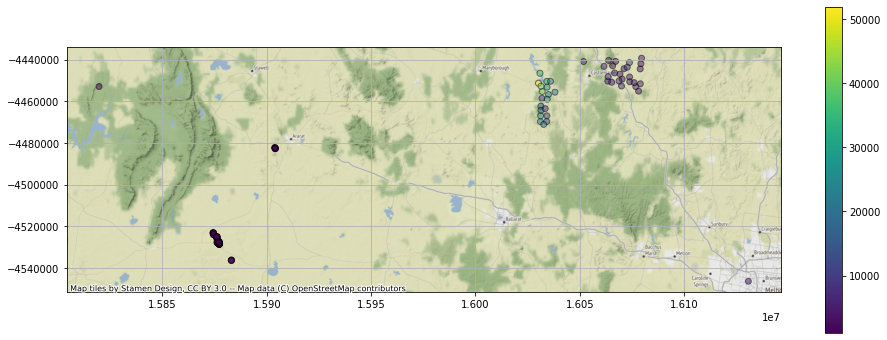

In [13]:
cu_westvic = cu_westvic.to_crs('epsg:3857')
ax = cu_westvic.plot(figsize=(16, 6), alpha=0.5, edgecolor='k', column='CU_PPM', legend=True)
ctx.add_basemap(ax)
ax.grid(True)

# We can save plots like so
plt.savefig('roi.png', bbox_inches='tight')

## Kernel Density Estimation

We can now look at displaying the distribution of copper prospective points.
The Seaborn library has a buch of useful processing and plotting functions that you can add on top of your geopandas plots.
https://seaborn.pydata.org/tutorial/distributions.html

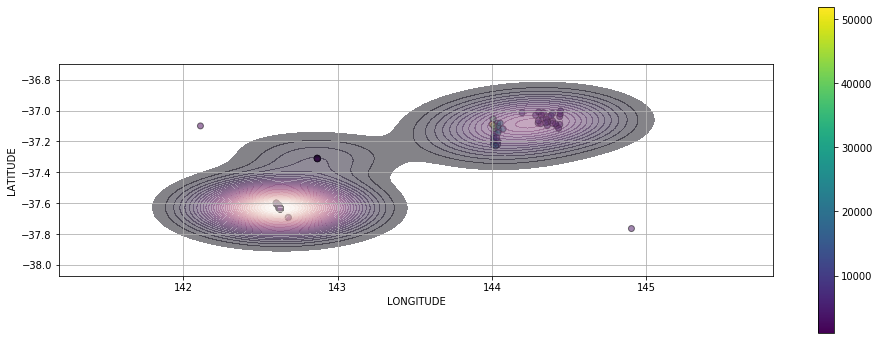

In [9]:
# Refilter data in the correct crs
cu_westvic = minerals[(minerals.LONGITUDE < 145.0) & (minerals.LATITUDE < -37.0) & (minerals.CU_PPM > 1000.0)]
# Create a base axis obeject to add our plots to
fig, ax = plt.subplots(figsize=(16,6))

# Plot our original prospective points and add to ax
cu_westvic.plot( ax=ax, alpha=0.5, edgecolor='k', column='CU_PPM', legend=True)

# Create a custom colour map
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

# Do kernel density estimation and add to ax
sns.kdeplot( cu_westvic.LONGITUDE, cu_westvic.LATITUDE, ax=ax, cmap=cmap, shade=True, shade_lowest=False, alpha=0.5, n_levels=45)

ax.grid(True)

## Why is this useful/better?

Approaching simple GIS with Python while accustomed to click and drag might seem a bit redundant with the above example - and it is. Programming features you've learned over this course namely functions make things much easier when you have to do more complicated stuff or repetitive simple stuff.
<br>
Imagine you had to create the above heatmap for Gold, Antimony and Arsenic as well as Copper, then save the results...

In [10]:
def heatmapMineral(original_data, mineral_thresh):
    cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
    fig, axs = plt.subplots(len(mineral_thresh), figsize=(40,24), sharex='all')
    count = 0
    for mineral in mineral_thresh.keys():
        thresh = mineral_thresh[mineral]
        data = original_data.copy()
        data = data[data[mineral] > thresh]
        
        # Plot our original prospective points and add to ax
        data.plot( ax=axs[count], alpha=0.5, edgecolor='k', column=mineral, legend=True)
        # Do kernel density estimation and add to ax
        sns.kdeplot(data.LONGITUDE, data.LATITUDE, ax=axs[count], cmap=cmap, shade=True, shade_lowest=False, alpha=0.5, n_levels=45)
        
        axs[count].grid(True)
        axs[count].set_title(mineral)
        
        count += 1

    plt.savefig('minerals.png',  bbox_inches='tight')

In [11]:
def inline_heatmapMineral(original_data, mineral_thresh):
    cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
    STEP_OUT = 1
    xmin = original_data.LONGITUDE.min()-STEP_OUT
    xmax = original_data.LONGITUDE.max()+STEP_OUT
    ymin = original_data.LATITUDE.min()-STEP_OUT
    ymax = original_data.LATITUDE.max()+STEP_OUT
    fig, axes = plt.subplots(figsize=(40,24), nrows=len(mineral_thresh), sharex=True, subplot_kw=dict(frameon=False)) # frameon=False removes frames
    count = 0
    for mineral in mineral_thresh.keys():
        thresh = mineral_thresh[mineral]
        data = original_data.copy()
        data = data[data[mineral] > thresh]
        
        # Plot our original prospective points and add to ax
        data.plot( ax=axes[count], alpha=0.5, edgecolor='k', column=mineral, legend=True)
        # Do kernel density estimation and add to ax
        sns.kdeplot(data.LONGITUDE, data.LATITUDE, ax=axes[count], cmap=cmap, shade=True, shade_lowest=False, alpha=0.5, n_levels=45)
        
        axes[count].grid(True)
        axes[count].set_title(mineral)
        axes[count].set_xlim([xmin,xmax])
        axes[count].set_ylim([ymin,ymax])
        if count != len(mineral_thresh) -1:
            x_axis = axes[count].get_xaxis()
            x_label = x_axis.get_label()
            x_label.set_visible(False)
        count += 1
        
    plt.savefig('minerals.png',  bbox_inches='tight')
    plt.subplots_adjust(hspace=.1)

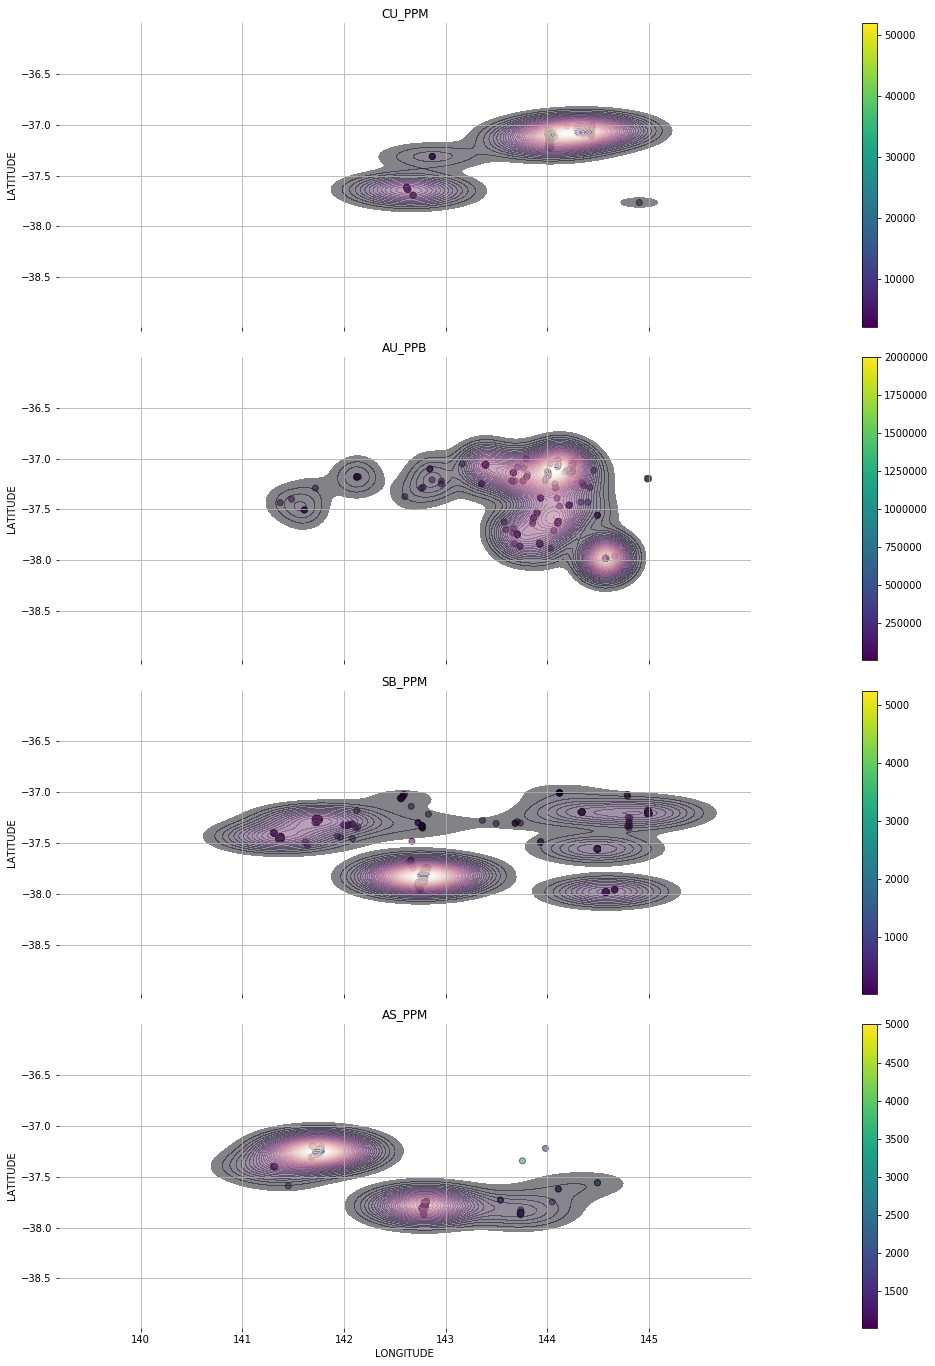

In [12]:
data = minerals[(minerals.LONGITUDE < 145.0) & (minerals.LATITUDE < -37.0)]

mineral_thresh = {
    "CU_PPM": 2000,
    "AU_PPB": 1000,
    "SB_PPM": 10,
    "AS_PPM": 1000
}

inline_heatmapMineral(data, mineral_thresh)